In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import mlrose_hiive as mlrose

In [8]:
nVals = [25, 50, 75, 100]
weight = {}
values = {}
np.random.seed(42)
for n in nVals:
    weight[n] = np.random.randint(low=1, high=20, size=n)
    values[n] = np.random.randint(low=1, high=200, size=n)
    
seed = 100 # for uniform results
max_weight = .4

HC Max iters:100
HC restarts:5


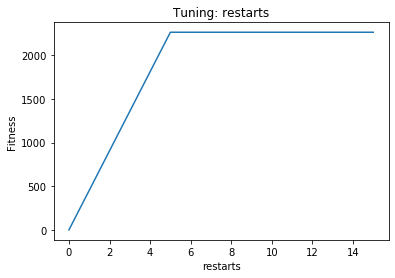

SA Max iters:1000
SA max_attempts:10
[0.0, 0.0, 0.0, 0.0, 1828.0, 1828.0, 1828.0, 1828.0, 1828.0, 1828.0, 1828.0, 1828.0]
12


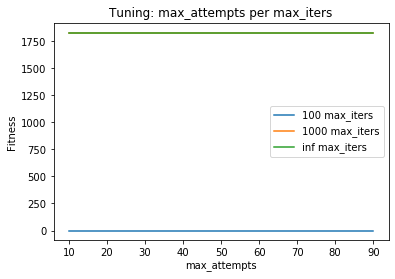

GA Max iters:1000
GA max_attempts:10
GA Max Pop Size:300
GA max Mutation Prob:0.1
[3197.0, 3242.0, 3243.0, 3197.0, 3242.0, 3243.0, 3197.0, 3242.0, 3243.0]
9


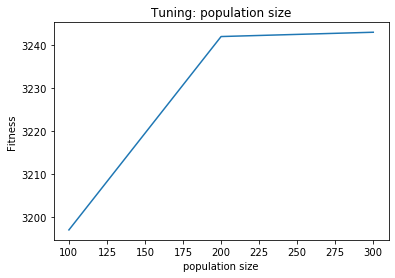

MIMIC Max iters:1000
MIMIC max_attempts:5
MIMIC keep_pct:0.1
MIMIC pop size:300
[2508.0, 3088.0, 3173.0, 2508.0, 3088.0, 3173.0, 2508.0, 3088.0, 3173.0]
9


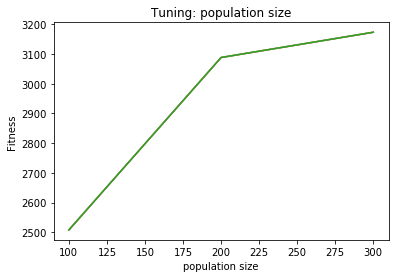

<Figure size 432x288 with 0 Axes>

In [111]:
# Hyperparameter Tuning-KnapSack

fitness_ks =  mlrose.Knapsack(weight[50], values[50], max_weight)
optimize_ks = mlrose.DiscreteOpt(50, fitness_fn=fitness_ks, maximize=True)


# Hillclimbing
# params to tune
max_iters = [100, 1000, np.inf]
restarts =  [0, 5, 10, 15]

opt_ks_max_iters = -1
opt_ks_restarts = -1
max_fitness = -1
restarts_fitness_scores = []

for i in max_iters:
    for r in restarts:
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            optimize_ks, random_state=seed, curve=True, max_iters=i, restarts=r)
        max_iter_fitness_scores.append(best_fitness)
        restarts_fitness_scores.append(best_fitness)
        if best_fitness > max_fitness:
            max_fitness = best_fitness
            opt_ks_max_iters = i
            opt_ks_restarts = r
print("HC Max iters:" + str(opt_ks_max_iters))
print("HC restarts:" + str(opt_ks_restarts))
#just plot restarts. The values repeat, so first 4 is representative
plt.plot(restarts, restarts_fitness_scores[0:4])
plt.title("Tuning: restarts")
plt.xlabel("restarts")
plt.ylabel("Fitness")
 
plt.savefig('../images/KnapSack_HillClimb_restart_tune.png')
plt.show()
plt.clf()

# SimAnneal
# params to tune
max_iters = [100, 1000, np.inf]
max_attempts = [10, 30, 60, 90]

opt_sa_max_iters = -1
opt_sa_max_attempts = -1
max_fitness = -1
max_attempts_fitness_scores = []

for i in max_iters:
    for ma in max_attempts:
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
                optimize_ks, schedule=mlrose.ExpDecay(), max_iters=i, max_attempts=a, random_state=seed)
        max_iter_fitness_scores.append(best_fitness)
        max_attempts_fitness_scores.append(best_fitness)
        if best_fitness > max_fitness:
            max_fitness = best_fitness
            opt_sa_max_iters = i
            opt_sa_max_attempts = ma
print("SA Max iters:" + str(opt_sa_max_iters))
print("SA max_attempts:" + str(opt_sa_max_attempts))
print(max_attempts_fitness_scores)
print(len(max_attempts_fitness_scores))
# just plot max_attempts
plt.plot(max_attempts, max_attempts_fitness_scores[0:4], label="100 max_iters")
plt.plot(max_attempts, max_attempts_fitness_scores[4:8], label="1000 max_iters")
plt.plot(max_attempts, max_attempts_fitness_scores[8:12], label="inf max_iters")
plt.title("Tuning: max_attempts per max_iters")
plt.xlabel("max_attempts")
plt.ylabel("Fitness")
plt.legend()
 
plt.savefig('../images/KnapSack_SA_max_attempts_tune.png')
plt.show()
plt.clf()

# GA
# params to tune
pop_size = [100, 200, 300]
max_attempts = [10, 15, 20]
max_iters = [1000]
mutation_prob=[0.1]

opt_ga_max_iters = 1000
opt_ga_max_attempts = -1
opt_ga_pop_size = -1
opt_ga_mut_prob = .1
                    
max_fitness = -1
max_attempts_fitness_scores = []
for ma in max_attempts:
    for ps in pop_size:
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            optimize_ks, mutation_prob=opt_ga_mut_prob, max_attempts=ma, max_iters=opt_ga_max_iters, pop_size=ps, random_state=seed)
        max_iter_fitness_scores.append(best_fitness)
        max_attempts_fitness_scores.append(best_fitness)
        if best_fitness > max_fitness:
            max_fitness = best_fitness
            opt_ga_max_attempts = ma
            opt_ga_pop_size = ps
                    
                    
print("GA Max iters:" + str(opt_ga_max_iters))
print("GA max_attempts:" + str(opt_ga_max_attempts))
print("GA Max Pop Size:" + str(opt_ga_pop_size))
print("GA max Mutation Prob:" + str(opt_ga_mut_prob))
print(max_attempts_fitness_scores)
print(len(max_attempts_fitness_scores))
# just plot max_attempts

# it's the same no matter then number of attempts. Just plot one population size change
plt.plot(pop_size, max_attempts_fitness_scores[0:3])
plt.title("Tuning: population size")
plt.xlabel("population size")
plt.ylabel("Fitness")
 
plt.savefig('../images/KnapSack_GA_pop_size_tune.png')
plt.show()
plt.clf()


# MIMIC
# params to tune
max_attempts = [5, 10, 15]
max_iters = [1000]
keep_pct=[0.1]
pop_size = [100, 200, 300]

opt_mimic_max_iters = 1000
opt_mimic_max_attempts = -1
opt_mimic_keep_pct = 0.1
opt_mimic_pop_size = -1
                    
max_fitness = -1
max_attempts_fitness_scores = []
for ma in max_attempts:
    for ps in pop_size:
        best_state, best_fitness, best_curve = mlrose.mimic(
            optimize_ks, max_attempts=ma, max_iters=opt_mimic_max_iters, 
            keep_pct=opt_mimic_keep_pct, pop_size=ps, random_state=seed)
        max_iter_fitness_scores.append(best_fitness)
        max_attempts_fitness_scores.append(best_fitness)
        if best_fitness > max_fitness:
            max_fitness = best_fitness
            opt_mimic_max_attempts = ma
            opt_mimic_pop_size = ps
                    
                    
print("MIMIC Max iters:" + str(opt_mimic_max_iters))
print("MIMIC max_attempts:" + str(opt_mimic_max_attempts))
print("MIMIC keep_pct:" + str(opt_mimic_keep_pct))
print("MIMIC pop size:" + str(opt_mimic_pop_size))
print(max_attempts_fitness_scores)
print(len(max_attempts_fitness_scores))

plt.plot(pop_size, max_attempts_fitness_scores[0:3], label="5 attempts")
plt.plot(pop_size, max_attempts_fitness_scores[3:6], label="10 attempts")
plt.plot(pop_size, max_attempts_fitness_scores[6:9], label="15 attempts")
plt.title("Tuning: population size")
plt.xlabel("population size")
plt.ylabel("Fitness")
 
plt.savefig('../images/KnapSack_MIMIC_pop_size_tune.png')
plt.show()
plt.clf()




In [ ]:
'''
Optimization results from above cell
HC Max iters:100
HC restarts:5

SA Max iters:1000
SA max_attempts:10

GA Max iters:1000
GA max_attempts:10
GA Max Pop Size:300
GA max Mutation Prob:0.1

MIMIC Max iters:1000
MIMIC max_attempts:5
MIMIC keep_pct:0.1
MIMIC pop size:300
'''

In [112]:
#KNAPSACK

# KnapSack + HillClimb
ks_results = {}
ks_results['hill'] = {} 
ks_results['hill']['fit_score'] = []
ks_results['hill']['time'] = []
ks_results['hill']['n_vals'] = []
ks_results['hill']['weights'] = []

for n in nVals:
    fitness_ks =  mlrose.Knapsack(weight[n], values[n], max_weight)
    optimize_ks = mlrose.DiscreteOpt(n, fitness_fn=fitness_ks, maximize=True)
    print('HillClimb n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.random_hill_climb(
        optimize_ks, random_state=seed, max_iters=100, restarts=5)
    end = timeit.default_timer() - start    
    ks_results['hill']['fit_score'].append(best_fitness)
    ks_results['hill']['time'].append(end)
    ks_results['hill']['n_vals'].append(n)
    ks_results['hill']['weights'].append(weight[n])   

# KnapSack + Simulated Annealing
ks_results['anneal'] = {}
ks_results['anneal']['fit_score'] = []
ks_results['anneal']['time'] = []
ks_results['anneal']['n_vals'] = []
ks_results['anneal']['weights'] = []

for n in nVals:
    fitness_ks =  mlrose.Knapsack(weight[n], values[n], max_weight)
    optimize_ks = mlrose.DiscreteOpt(n, fitness_fn=fitness_ks, maximize=True)
    print('SimAnneal n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.simulated_annealing(
                optimize_ks, schedule=mlrose.ExpDecay(), max_iters=1000,
                max_attempts=10, random_state=seed)
    end = timeit.default_timer() - start    
    ks_results['anneal']['fit_score'].append(best_fitness)
    ks_results['anneal']['time'].append(end)
    ks_results['anneal']['n_vals'].append(n)
    ks_results['anneal']['weights'].append(weight[n])

# Genetic Algo
ks_results['genetic'] = {}
ks_results['genetic']['fit_score'] = []
ks_results['genetic']['time'] = []
ks_results['genetic']['n_vals'] = []
ks_results['genetic']['weights'] = []

for n in nVals:
    fitness_ks =  mlrose.Knapsack(weight[n], values[n], max_weight)
    optimize_ks = mlrose.DiscreteOpt(n, fitness_fn=fitness_ks, maximize=True)
    print('Genetic n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.genetic_alg(
        optimize_ks, max_iters=1000, mutation_prob=0.1, 
        max_attempts=10, pop_size=300, random_state=seed)
    end = timeit.default_timer() - start
    ks_results['genetic']['fit_score'].append(best_fitness)
    ks_results['genetic']['time'].append(end)
    ks_results['genetic']['n_vals'].append(n)
    ks_results['genetic']['weights'].append(weight[n])

# MIMIC
ks_results['MIMIC'] = {}
ks_results['MIMIC']['fit_score'] = []
ks_results['MIMIC']['time'] = []
ks_results['MIMIC']['n_vals'] = []
ks_results['MIMIC']['weights'] = []

for n in nVals:
    fitness_ks =  mlrose.Knapsack(weight[n], values[n], max_weight)
    optimize_ks = mlrose.DiscreteOpt(n, fitness_fn=fitness_ks, maximize=True)
    print('MIMIC n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.mimic(
            optimize_ks, keep_pct = 0.1, 
            max_attempts=5, max_iters=1000, pop_size=300, 
            random_state=seed)
    end = timeit.default_timer() - start
    ks_results['MIMIC']['fit_score'].append(best_fitness)
    ks_results['MIMIC']['time'].append(end)
    ks_results['MIMIC']['n_vals'].append(n)
    ks_results['MIMIC']['weights'].append(weight[n])

HillClimb n: 25
HillClimb n: 50
HillClimb n: 75
HillClimb n: 100
SimAnneal n: 25
SimAnneal n: 50
SimAnneal n: 75
SimAnneal n: 100
Genetic n: 25
Genetic n: 50
Genetic n: 75
Genetic n: 100
MIMIC n: 25
MIMIC n: 50
MIMIC n: 75
MIMIC n: 100


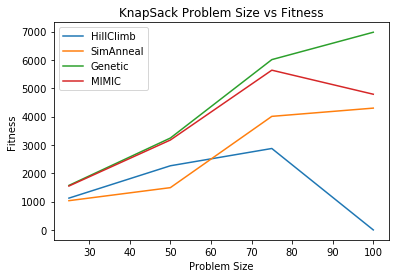

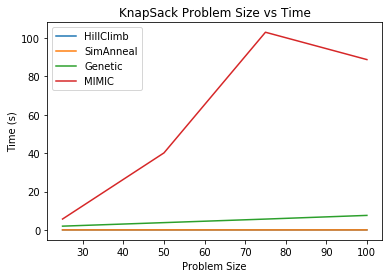

<Figure size 432x288 with 0 Axes>

In [113]:
ks_results_df = pd.DataFrame(ks_results)
plot_results(ks_results_df, 'KnapSack')

In [114]:
# where is hillclimb above?
ks_results['hill']['time']


[0.010168799999519251,
 0.005640899998979876,
 0.00550429999930202,
 0.004411699999764096]

In [10]:
#FOURPEAKS

# 4Peaks + HillClimb
fp_results = {}
fp_results['hill'] = {} 
fp_results['hill']['fit_score'] = []
fp_results['hill']['time'] = []
fp_results['hill']['n_vals'] = []
fp_results['hill']['weights'] = []

for n in nVals:
    fitness_4p = mlrose.FourPeaks(t_pct=0.2)
    optimize_4p = mlrose.DiscreteOpt(n, fitness_fn=fitness_4p, maximize=True)
    print('HillClimb n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.random_hill_climb(
        optimize_4p, random_state=seed)
    end = timeit.default_timer() - start    
    fp_results['hill']['fit_score'].append(best_fitness)
    fp_results['hill']['time'].append(end)
    fp_results['hill']['n_vals'].append(n)
    fp_results['hill']['weights'].append(weight[n])   

# 4Peaks + Simulated Annealing
fp_results['anneal'] = {}
fp_results['anneal']['fit_score'] = []
fp_results['anneal']['time'] = []
fp_results['anneal']['n_vals'] = []
fp_results['anneal']['weights'] = []

for n in nVals:
    fitness_4p = mlrose.FourPeaks(t_pct=0.2)
    optimize_4p = mlrose.DiscreteOpt(n, fitness_fn=fitness_4p, maximize=True)
    print('SimAnneal n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.simulated_annealing(
                optimize_4p, schedule=mlrose.ExpDecay(), max_attempts=75, random_state=seed)
    end = timeit.default_timer() - start    
    fp_results['anneal']['fit_score'].append(best_fitness)
    fp_results['anneal']['time'].append(end)
    fp_results['anneal']['n_vals'].append(n)
    fp_results['anneal']['weights'].append(weight[n])

# Genetic Algo
fp_results['genetic'] = {}
fp_results['genetic']['fit_score'] = []
fp_results['genetic']['time'] = []
fp_results['genetic']['n_vals'] = []
fp_results['genetic']['weights'] = []

for n in nVals:
    fitness_4p = mlrose.FourPeaks(t_pct=0.2)
    optimize_4p = mlrose.DiscreteOpt(n, fitness_fn=fitness_4p, maximize=True)
    print('Genetic n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.genetic_alg(
        optimize_4p, mutation_prob=0.1, max_attempts=15, random_state=(5 * seed))
    end = timeit.default_timer() - start
    fp_results['genetic']['fit_score'].append(best_fitness)
    fp_results['genetic']['time'].append(end)
    fp_results['genetic']['n_vals'].append(n)
    fp_results['genetic']['weights'].append(weight[n])

# MIMIC
fp_results['MIMIC'] = {}
fp_results['MIMIC']['fit_score'] = []
fp_results['MIMIC']['time'] = []
fp_results['MIMIC']['n_vals'] = []
fp_results['MIMIC']['weights'] = []

for n in nVals:
    fitness_4p = mlrose.FourPeaks()
    optimize_4p = mlrose.DiscreteOpt(n, fitness_fn=fitness_4p, maximize=True)
    print('MIMIC n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.mimic(
            optimize_4p, keep_pct = 0.2, max_attempts=10, max_iters=1000, random_state=seed)
    end = timeit.default_timer() - start
    fp_results['MIMIC']['fit_score'].append(best_fitness)
    fp_results['MIMIC']['time'].append(end)
    fp_results['MIMIC']['n_vals'].append(n)
    fp_results['MIMIC']['weights'].append(weight[n])

HillClimb n: 25
HillClimb n: 50
HillClimb n: 75
HillClimb n: 100
SimAnneal n: 25
SimAnneal n: 50
SimAnneal n: 75
SimAnneal n: 100
Genetic n: 25
Genetic n: 50
Genetic n: 75
Genetic n: 100
MIMIC n: 25
MIMIC n: 50
MIMIC n: 75
MIMIC n: 100


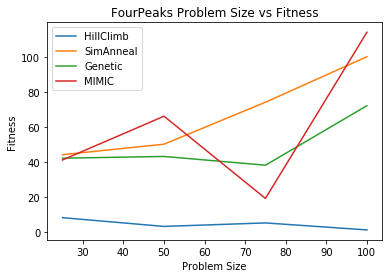

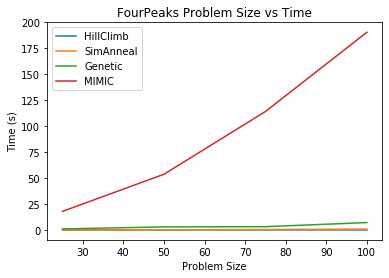

<Figure size 432x288 with 0 Axes>

In [11]:
fp_results_df = pd.DataFrame(fp_results)
plot_results(fp_results_df, 'FourPeaks')

In [12]:
#FLIPFLOP

# FF + HillClimb
ff_results = {}
ff_results['hill'] = {} 
ff_results['hill']['fit_score'] = []
ff_results['hill']['time'] = []
ff_results['hill']['n_vals'] = []
ff_results['hill']['weights'] = []

for n in nVals:
    fitness_ff = mlrose.FlipFlop()
    optimize_ff = mlrose.DiscreteOpt(n, fitness_fn=fitness_ff, maximize=True)
    print('HillClimb n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.random_hill_climb(
        optimize_ff, random_state=seed)
    end = timeit.default_timer() - start    
    ff_results['hill']['fit_score'].append(best_fitness)
    ff_results['hill']['time'].append(end)
    ff_results['hill']['n_vals'].append(n)
    ff_results['hill']['weights'].append(weight[n])   

# FlipFlop + Simulated Annealing
ff_results['anneal'] = {}
ff_results['anneal']['fit_score'] = []
ff_results['anneal']['time'] = []
ff_results['anneal']['n_vals'] = []
ff_results['anneal']['weights'] = []

for n in nVals:
    fitness_ff = mlrose.FlipFlop()
    optimize_ff = mlrose.DiscreteOpt(n, fitness_fn=fitness_ff, maximize=True)
    print('SimAnneal n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.simulated_annealing(
                optimize_ff, schedule=mlrose.ExpDecay(), max_attempts=75, random_state=seed)
    end = timeit.default_timer() - start    
    ff_results['anneal']['fit_score'].append(best_fitness)
    ff_results['anneal']['time'].append(end)
    ff_results['anneal']['n_vals'].append(n)
    ff_results['anneal']['weights'].append(weight[n])

# Genetic Algo
ff_results['genetic'] = {}
ff_results['genetic']['fit_score'] = []
ff_results['genetic']['time'] = []
ff_results['genetic']['n_vals'] = []
ff_results['genetic']['weights'] = []

for n in nVals:
    fitness_ff = mlrose.FlipFlop()
    optimize_ff = mlrose.DiscreteOpt(n, fitness_fn=fitness_ff, maximize=True)
    print('Genetic n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.genetic_alg(
        optimize_ff, mutation_prob=0.1, max_attempts=15, random_state=(5 * seed))
    end = timeit.default_timer() - start
    ff_results['genetic']['fit_score'].append(best_fitness)
    ff_results['genetic']['time'].append(end)
    ff_results['genetic']['n_vals'].append(n)
    ff_results['genetic']['weights'].append(weight[n])

# MIMIC
ff_results['MIMIC'] = {}
ff_results['MIMIC']['fit_score'] = []
ff_results['MIMIC']['time'] = []
ff_results['MIMIC']['n_vals'] = []
ff_results['MIMIC']['weights'] = []
for n in nVals:
    fitness_ff = mlrose.FlipFlop()
    optimize_ff = mlrose.DiscreteOpt(n, fitness_fn=fitness_ff, maximize=True)
    print('MIMIC n: ' + str(n))
    start = timeit.default_timer()
    best_state, best_fitness, best_curve = mlrose.mimic(
            optimize_ff, keep_pct = 0.2, max_attempts=10, max_iters=1000, random_state=seed)
    end = timeit.default_timer() - start
    ff_results['MIMIC']['fit_score'].append(best_fitness)
    ff_results['MIMIC']['time'].append(end)
    ff_results['MIMIC']['n_vals'].append(n)
    ff_results['MIMIC']['weights'].append(weight[n])

HillClimb n: 25
HillClimb n: 50
HillClimb n: 75
HillClimb n: 100
SimAnneal n: 25
SimAnneal n: 50
SimAnneal n: 75
SimAnneal n: 100
Genetic n: 25
Genetic n: 50
Genetic n: 75
Genetic n: 100
MIMIC n: 25
MIMIC n: 50
MIMIC n: 75
MIMIC n: 100


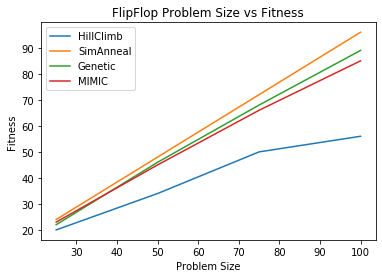

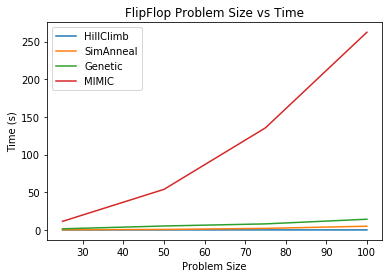

<Figure size 432x288 with 0 Axes>

In [13]:
ff_results_df = pd.DataFrame(ff_results)
plot_results(ff_results_df, 'FlipFlop')

In [39]:
def plot_results(results, algo):
    
    # Problem Size vs Fitness
    plt.plot(results['hill']['n_vals'], results['hill']['fit_score'], label='HillClimb')
    plt.plot(results['anneal']['n_vals'], results['anneal']['fit_score'], label='SimAnneal')
    plt.plot(results['genetic']['n_vals'], results['genetic']['fit_score'], label='Genetic')
    plt.plot(results['MIMIC']['n_vals'], results['MIMIC']['fit_score'], label='MIMIC')
    plt.title(algo + ' Problem Size vs Fitness')
    plt.xlabel('Problem Size')
    plt.ylabel('Fitness')
    plt.legend()
    plt.savefig('../images/' + algo + '_size_v_fitness.png')
    plt.show()
    plt.clf()
    
    # Problem Size vs Time
    plt.plot(results['hill']['n_vals'], results['hill']['time'], label='HillClimb')
    plt.plot(results['anneal']['n_vals'], results['anneal']['time'], label='SimAnneal')
    plt.plot(results['genetic']['n_vals'], results['genetic']['time'], label='Genetic')
    plt.plot(results['MIMIC']['n_vals'], results['MIMIC']['time'], label='MIMIC')
    plt.title(algo + ' Problem Size vs Time')
    plt.xlabel('Problem Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.savefig('../images/' + algo + '_size_v_time.png')
    plt.show()
    plt.clf()